In [1]:
#World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. 
#Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
#The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and 
#in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well
#as predict the overall risk using logistic regression Data Preparation.

# Reading Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"framingham.csv")

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
#Data has no object type column

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
# dropping unnecessary columns

In [9]:
data.drop(["BPMeds", "education"],axis=1,inplace=True)

C:\Users\prach\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prach\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prach\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totChol'>

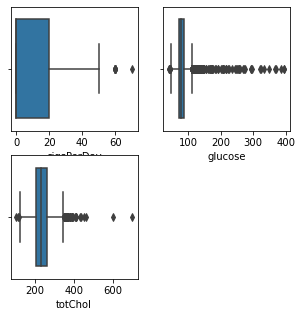

In [10]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
sns.boxplot(data["cigsPerDay"])
plt.subplot(2,2,2)
sns.boxplot(data["glucose"])
plt.subplot(2,2,3)
sns.boxplot(data["totChol"])


In [11]:
data=data[(data["totChol"]<500) | (data["totChol"]>150)]
data=data[(data["glucose"]<390) | (data["glucose"]>60)]
data=data[data["cigsPerDay"]<60]

In [12]:
# Since toChol and glucose have NaN values and also outliers are there, so replacing with mean is not a good idea as mean is
# highly influenced by the outliers. So, replacing with median is a good idea.


In [13]:
data.cigsPerDay = data.cigsPerDay.fillna(np.mean(data.cigsPerDay))
data.totChol = data.totChol.fillna(np.median(data.totChol))
data.BMI = data.BMI.fillna(np.mean(data.BMI))
data.heartRate = data.heartRate.fillna(np.mean(data.heartRate))
data.glucose = data.glucose.fillna(np.median(data.glucose))

In [14]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

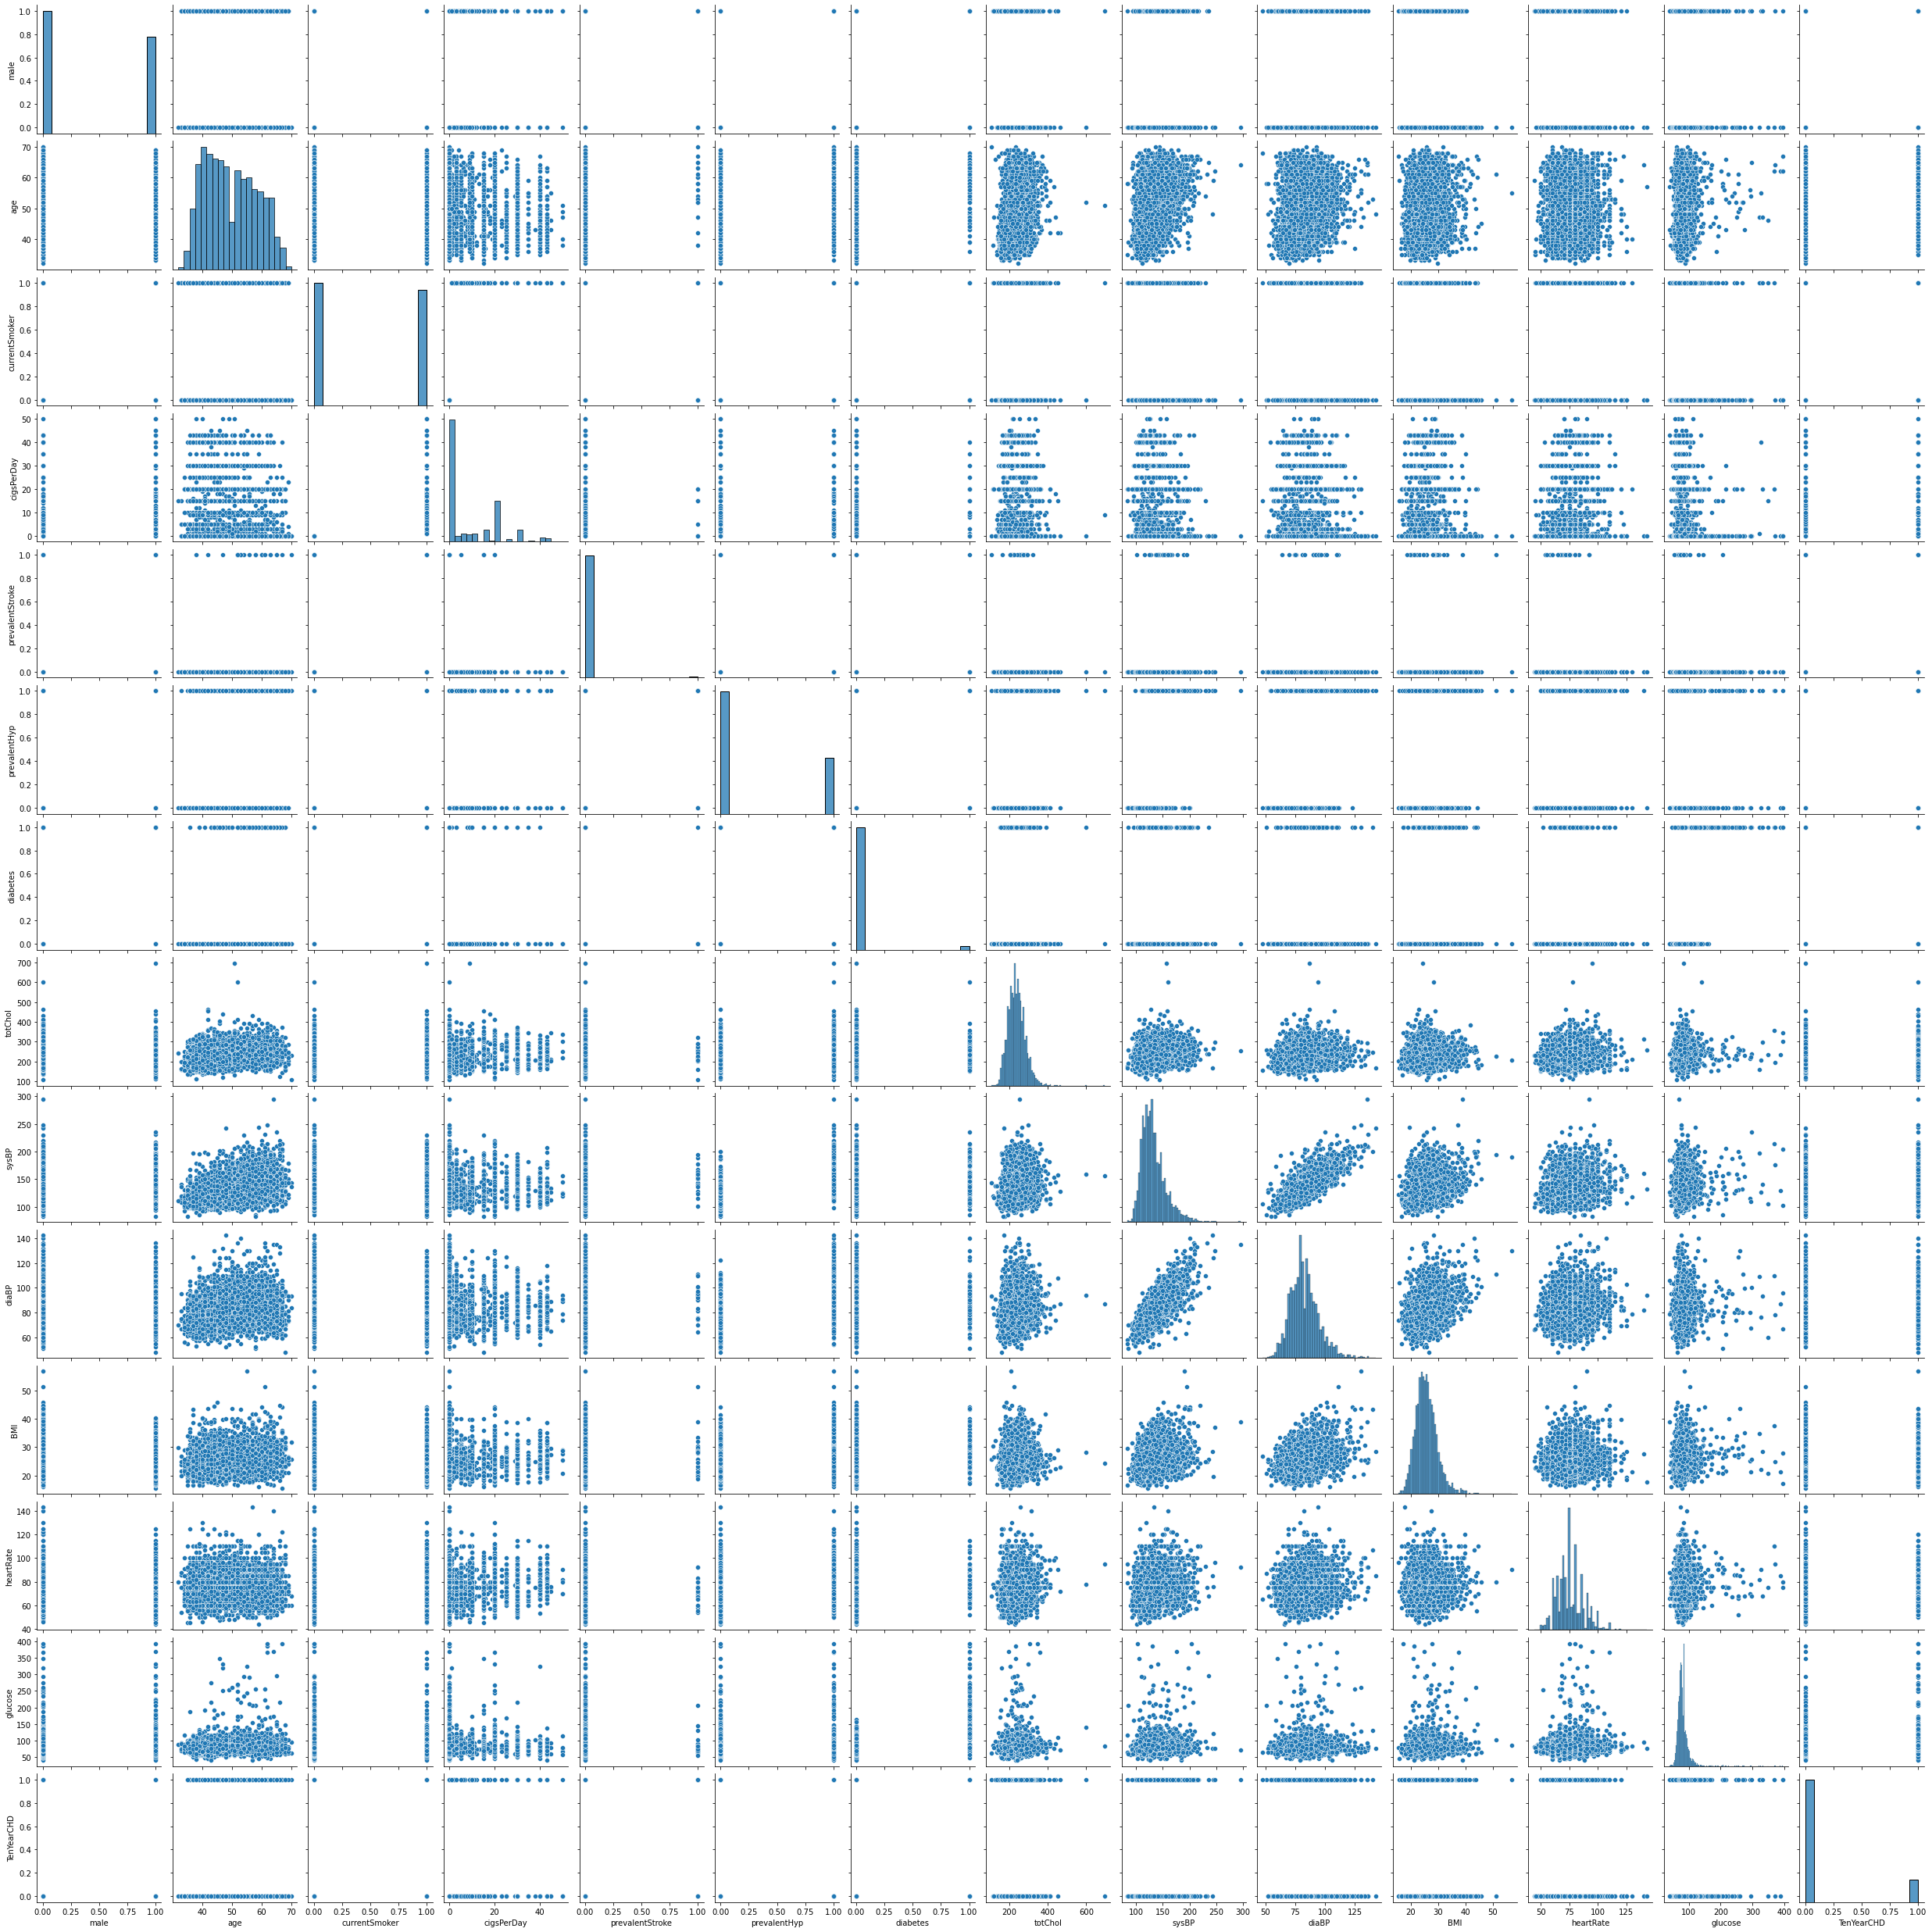

In [15]:
sns.pairplot(data)

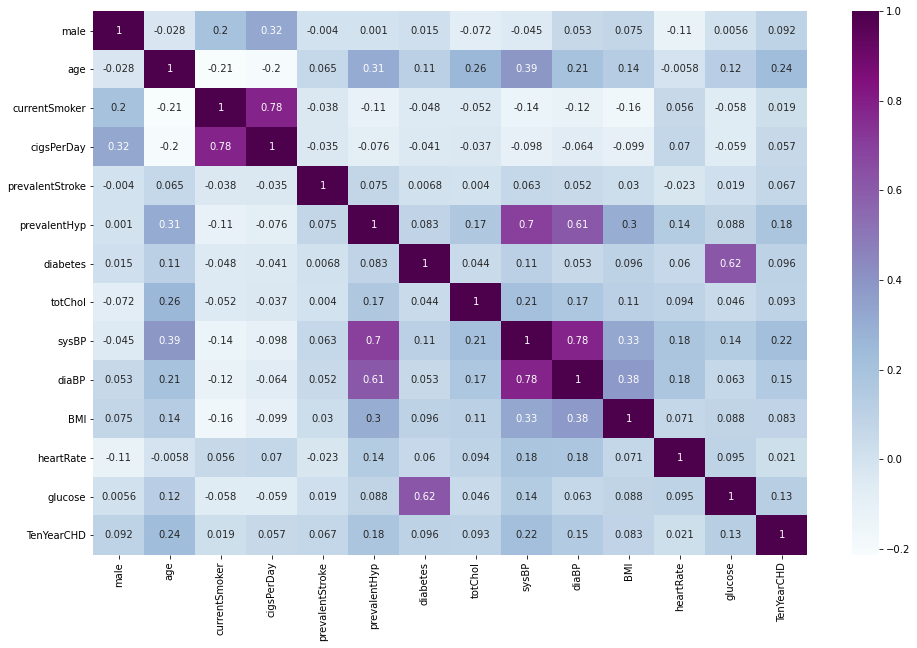

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")
plt.show()

In [17]:
# since currentSmoker has very low cor_coeff so we can drop it

In [18]:
data.drop(["currentSmoker"],axis=1,inplace=True)

# Logistic Regression

In [19]:
x=data.drop(["TenYearCHD"],axis=1)
y=data["TenYearCHD"]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=4000)
#fit the datasete
model.fit(x_train,y_train)

LogisticRegression(max_iter=4000)

In [22]:
#predicting the output for our dataset
y_pred=model.predict(x_test)


In [23]:
from sklearn import metrics
matrix_conf=metrics.confusion_matrix(y_test,y_pred)
matrix_conf

array([[793,   4],
       [146,   8]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

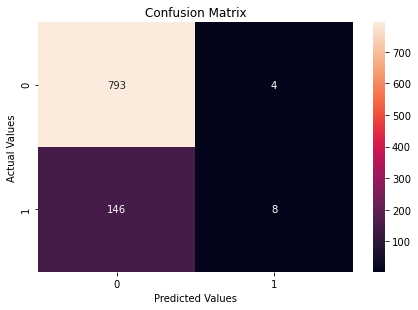

In [24]:
sns.heatmap(pd.DataFrame(matrix_conf,dtype=np.float64),annot=True,fmt='g')
plt.tight_layout()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ' , accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,y_pred)
print('Precision: ' , precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred)
print('Recall: ' ,recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: ' , f1)

Accuracy:  0.8422712933753943
Precision:  0.6666666666666666
Recall:  0.05194805194805195
F1 score:  0.0963855421686747


# Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [27]:
coeff_df = pd.DataFrame(regr.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
male,0.053105
age,0.006966
cigsPerDay,0.002440
prevalentStroke,0.316573
prevalentHyp,0.015688
diabetes,0.038135
totChol,0.000290
sysBP,0.002648
diaBP,-0.001228
BMI,0.000492


In [28]:
y_pred = regr.predict(x_test)

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
3581,1,0.064831
2692,0,0.004104
3917,0,0.069413
1278,0,0.205254
3220,1,0.257330
...,...,...
4224,0,0.095520
1899,0,0.182306
2943,1,0.132913
1147,0,0.224777


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ' , accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,y_pred)
print('Precision: ' , precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred)
print('Recall: ' ,recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: ' , f1)

Accuracy:  0.8422712933753943
Precision:  0.6666666666666666
Recall:  0.05194805194805195
F1 score:  0.0963855421686747


# Iteraction -2

*Checking for skewness in dataset*

In [30]:
data.skew(axis=0)

male                0.236212
age                 0.224027
cigsPerDay          1.126737
prevalentStroke    12.475138
prevalentHyp        0.805072
diabetes            5.769160
totChol             0.903462
sysBP               1.161501
diaBP               0.719948
BMI                 0.988268
heartRate           0.661252
glucose             6.215954
TenYearCHD          1.906278
dtype: float64

In [31]:
# As some columns show large amount of skewness, to reduce it, applying log on such columns

In [32]:
data.drop(['prevalentStroke','glucose'],inplace=True,axis=1)
data['diabetes']=np.sqrt(data['diabetes'])
data['sysBP']=np.log(data['sysBP'])
data['cigsPerDay']=np.sqrt(data['cigsPerDay'])
data['totChol']=np.log(data['totChol'])
data['BMI']=np.log(data['BMI'])
data['totChol']=np.log(data['totChol'])


In [33]:
data.skew(axis=0)

male            0.236212
age             0.224027
cigsPerDay      0.488406
prevalentHyp    0.805072
diabetes        5.769160
totChol        -0.108421
sysBP           0.607164
diaBP           0.719948
BMI             0.312709
heartRate       0.661252
TenYearCHD      1.906278
dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=4000)
#fit the datasete
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ' , accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,y_pred)
print('Precision: ' , precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred)
print('Recall: ' ,recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: ' , f1)

Accuracy:  0.8422712933753943
Precision:  0.6666666666666666
Recall:  0.05194805194805195
F1 score:  0.0963855421686747
